Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Load the Dataset

In [4]:
df = pd.read_csv("House Price Prediction Dataset.csv")
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [5]:
df.head().style.background_gradient(cmap='PuBu')

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


Understand the Dataset
- Check basic details.
- Check for missing values.

In [9]:
from colorama import Fore, Style

# Print the shape of the dataframe (number of rows and columns)
print(Fore.CYAN + "df shape: " + Style.RESET_ALL)
print(f"{df.shape}\n")

# Print basic information about the dataframe (column names, data types, non-null values)
print(Fore.GREEN + "df info: " + Style.RESET_ALL)
print(f"{df.info()}\n")

# Print the count of missing (NaN) values in each columns 
print(Fore.YELLOW + "df isnull sum: " + Style.RESET_ALL)
print(f"{df.isna().sum()}\n")

# Print summary statistics for numerical column s(count, mean, std, min, max, etc.)
print(Fore.MAGENTA + "df describe: " + Style.RESET_ALL)
print(f"{df.describe()}\n")

df shape: 
(2000, 10)

df info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None

df isnull sum: 
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

df describe: 
                Id         Area  ...    YearBuilt          Price
count  2000.000000  2000.000000  ...  2000.000000    2000.000000
mean   100

In [11]:
# Define the Numerical and Categorical Columns 
numerical = df.select_dtypes(include=["int64"]).columns
categorical = df.select_dtypes(include=["object"]).columns

print(f"We have features: {len(numerical)} numerical feature {numerical}")
print(100 * "-")
print(f"We have features: {len(categorical)} categorical features {categorical}")

We have features: 7 numerical feature Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price'], dtype='object')
----------------------------------------------------------------------------------------------------
We have features: 3 categorical features Index(['Location', 'Condition', 'Garage'], dtype='object')


## EDA 

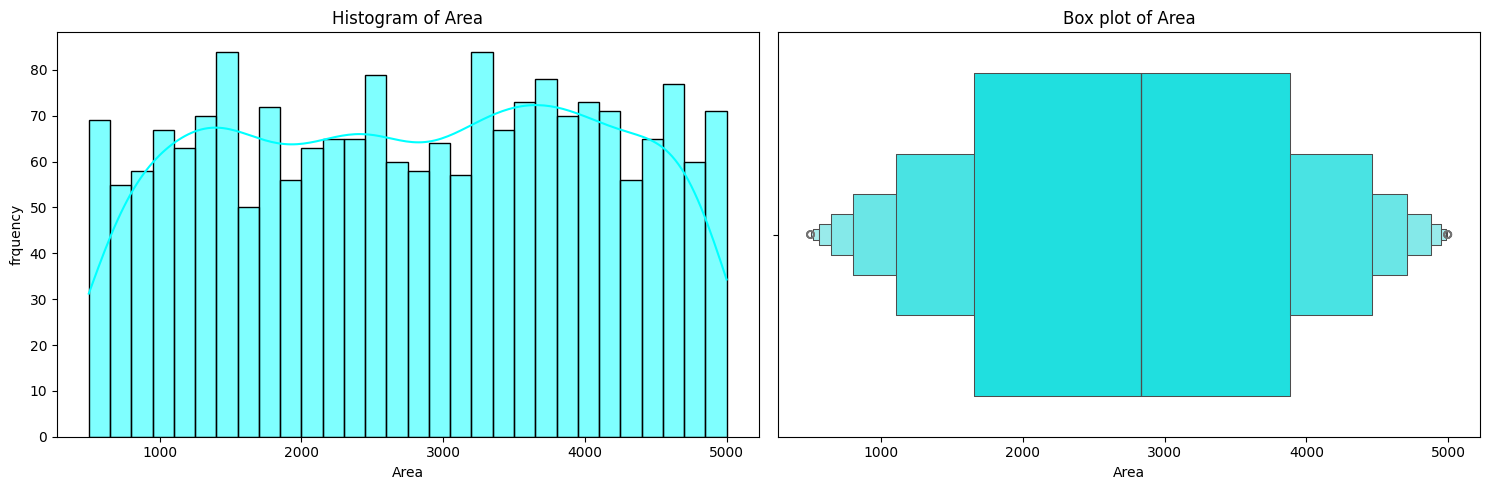

Number of Unique Area: 1622
Missing Values in Area: 0



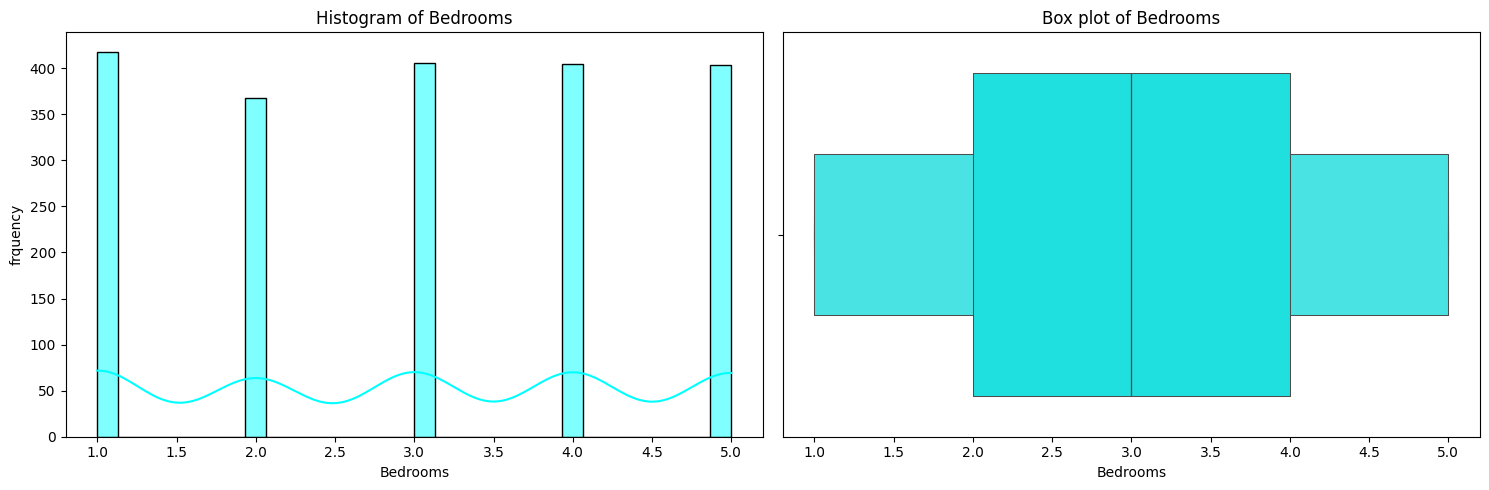

Number of Unique Bedrooms: 5
Missing Values in Bedrooms: 0



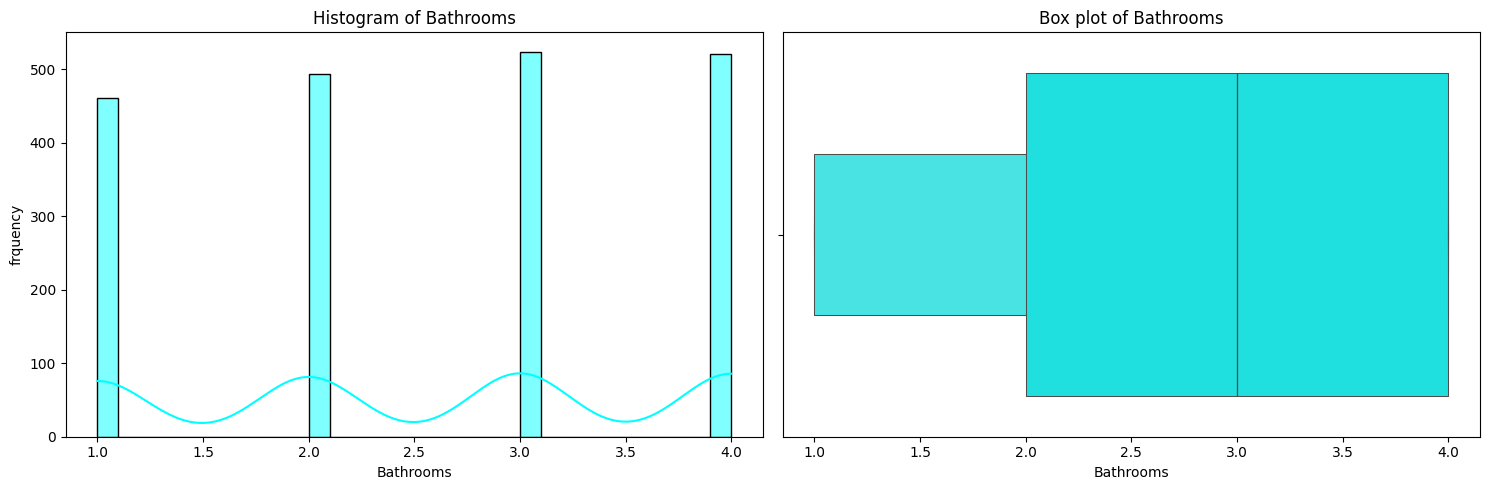

Number of Unique Bathrooms: 4
Missing Values in Bathrooms: 0



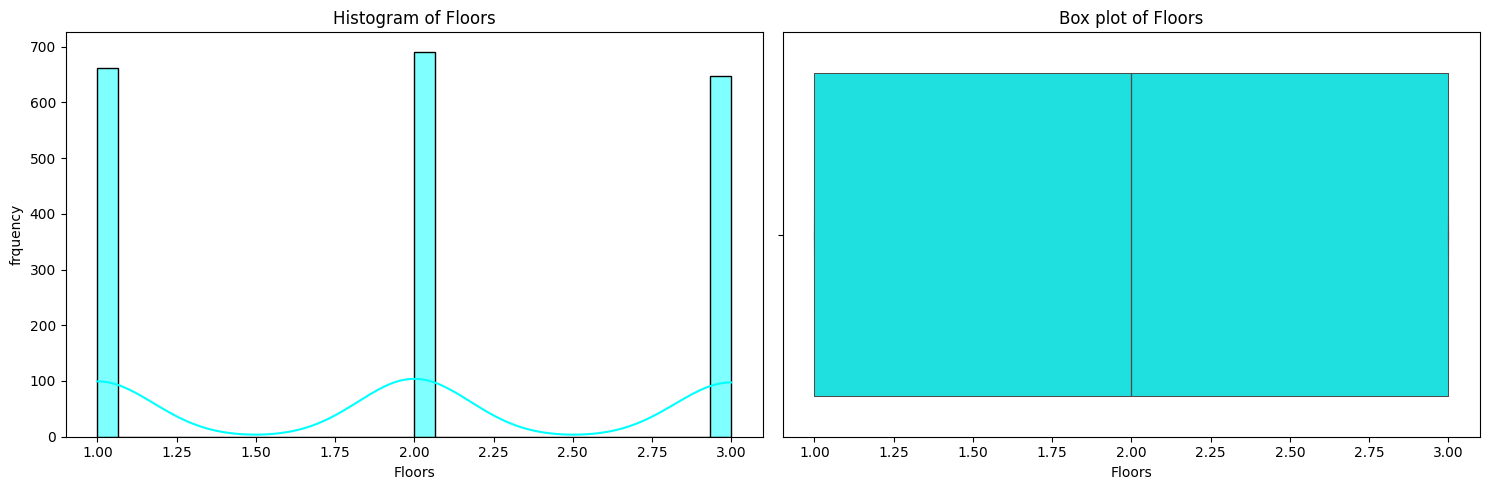

Number of Unique Floors: 3
Missing Values in Floors: 0



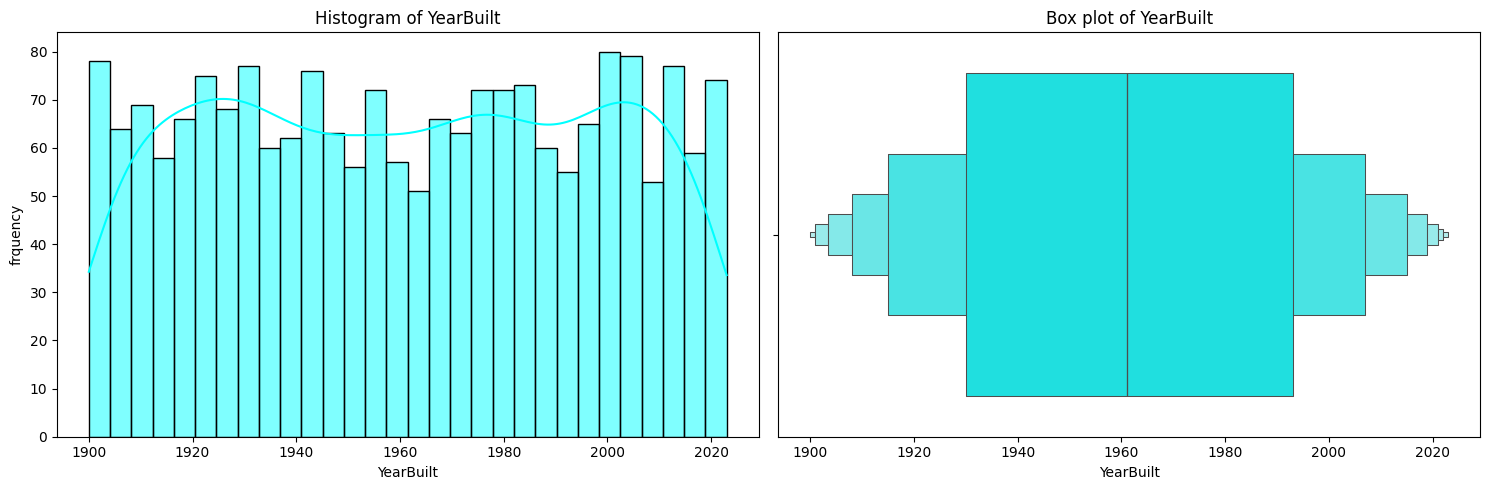

Number of Unique YearBuilt: 124
Missing Values in YearBuilt: 0



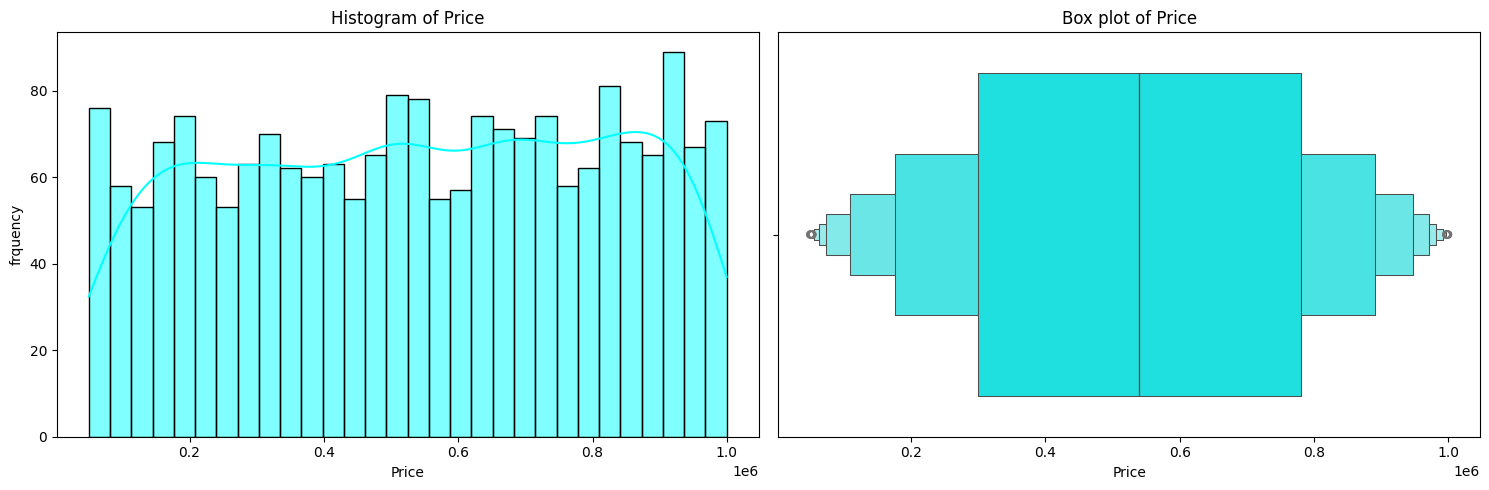

Number of Unique Price: 1999
Missing Values in Price: 0



In [14]:
numerical = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']

for col in numerical:
    plt.figure(figsize= (15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='cyan')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("frquency")

    plt.subplot(1, 2, 2)
    sns.boxenplot(data=df, x=col, color="cyan")
    plt.title(f"Box plot of {col}")
    plt.tight_layout()
    plt.show()

    # Print unique and missing values
    print(f"Number of Unique {col}: {df[col].nunique()}")
    print(f"Missing Values in {col}: {df[col].isnull().sum()}\n")

### Categorical Features

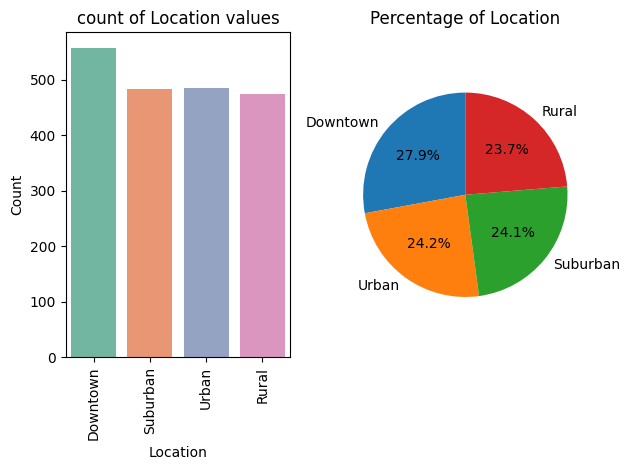

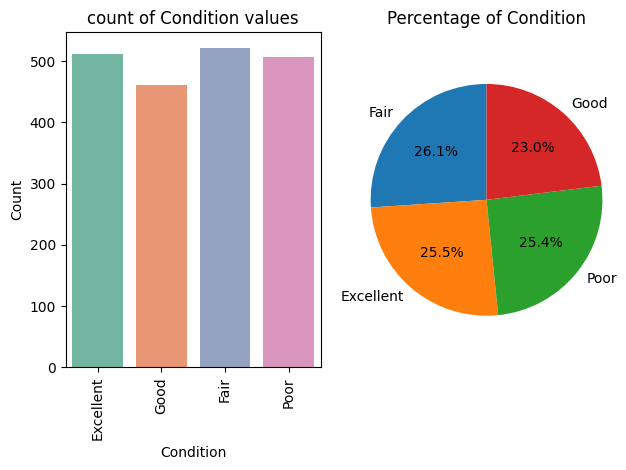

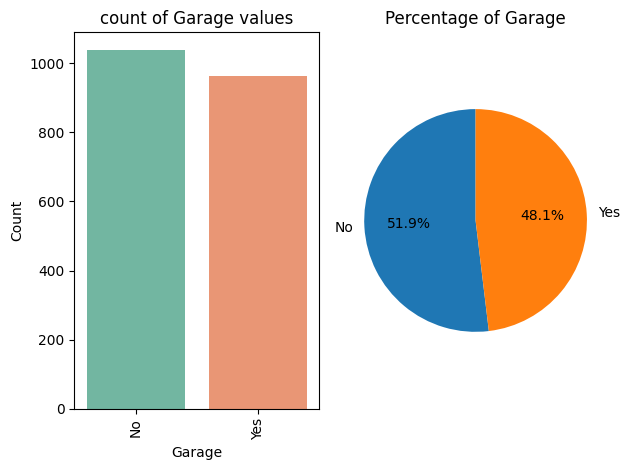

In [21]:
for col in ['Location', 'Condition', 'Garage']:
    counts = df[col].value_counts()
    plt.Figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"count of {col} values")
    plt.xticks(rotation = 90)
    plt.ylabel("Count")
    # plt.show()

    plt.subplot(1, 2, 2)
    plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"Percentage of {col}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

### Categorical Features vs Label

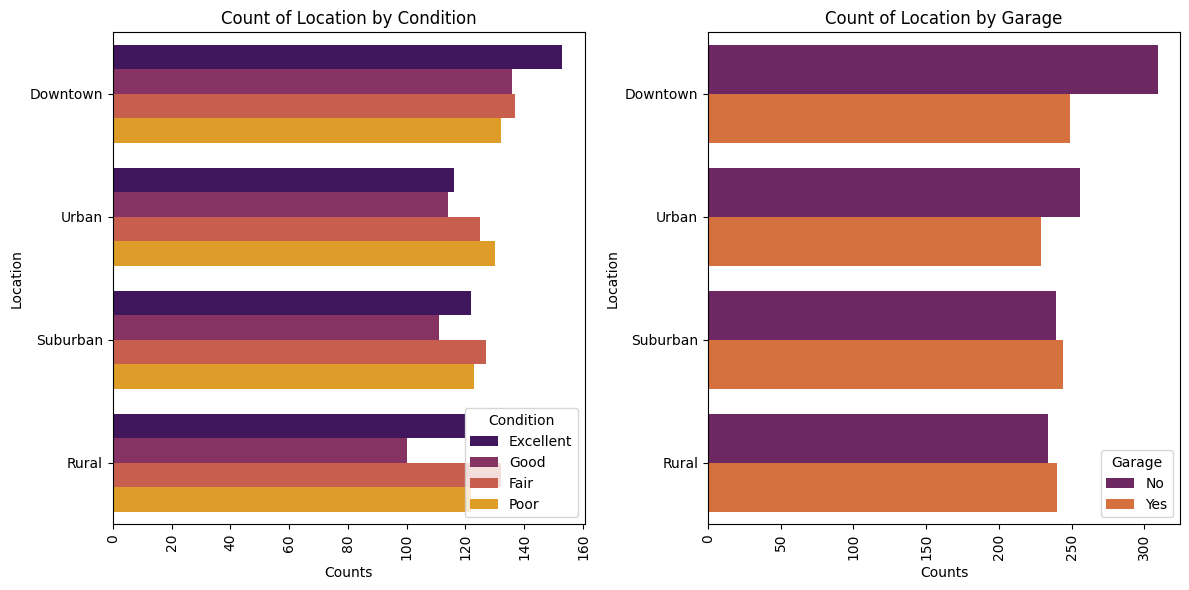

In [23]:
# Create a figure with two subplots 
fig, axs = plt.subplots(1, 2, figsize= (12, 6))

# Subplot 1: Count of Location by Condition
sns.countplot(data=df, y="Location", order=df["Location"].value_counts().index, hue="Condition", palette="inferno", ax=axs[0])
axs[0].set_title("Count of Location by Condition")
axs[0].set_xlabel("Counts")
axs[0].set_ylabel("Location")
axs[0].tick_params(axis='x', rotation=90)


# subplot 2: Count of Location by Garage
sns.countplot(data=df, y="Location", order=df["Location"].value_counts().index, hue="Garage", palette="inferno", ax=axs[1])
axs[1].set_title("Count of Location by Garage")
axs[1].set_xlabel("Counts")
axs[1].set_ylabel("Location")
axs[1].tick_params(axis='x', rotation = 90)

# Layout so plots do not overlap
fig.tight_layout()
plt.show()

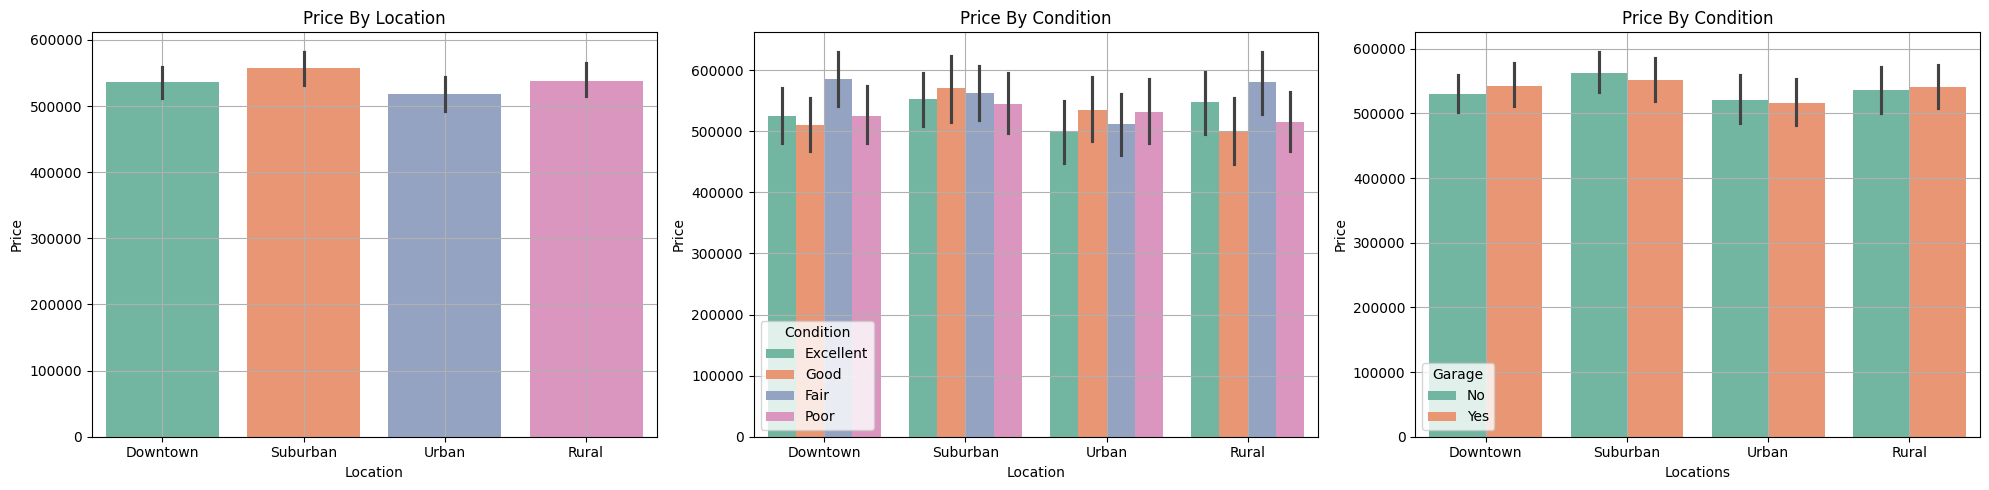

In [26]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.barplot(data=df, x="Location", y="Price", hue="Location", palette="Set2")
plt.title("Price By Location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.grid()


plt.subplot(1, 3, 2)
sns.barplot(data=df, x="Location", y="Price", hue="Condition", palette="Set2")
plt.title("Price By Condition")
plt.xlabel("Location")
plt.ylabel("Price")
plt.grid()


plt.subplot(1, 3, 3)
sns.barplot(data=df, x="Location", y="Price", hue="Garage", palette="Set2")
plt.title("Price By Condition")
plt.xlabel("Locations")
plt.ylabel("Price")
plt.grid()

plt.tight_layout()
plt.show()

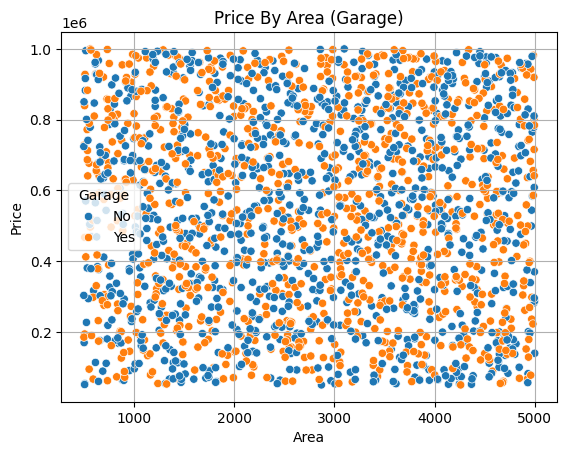

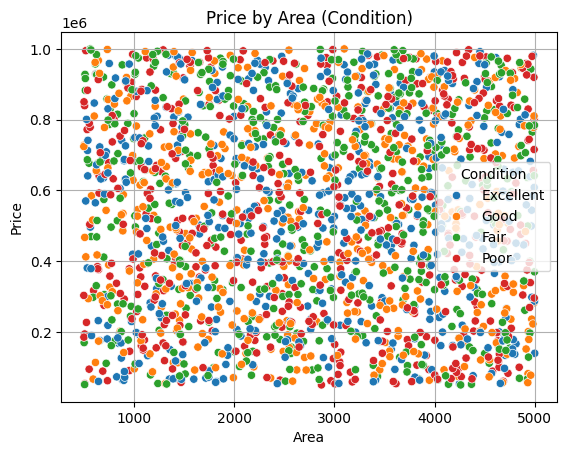

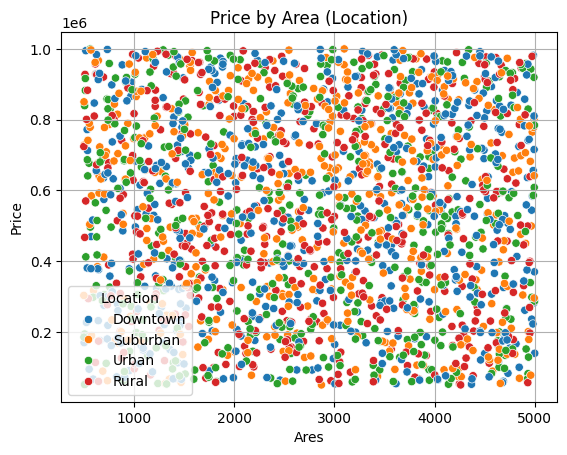

In [27]:
# Scatter Plot: Price by Area, colored by Garage 
sns.scatterplot(data=df, x="Area", y="Price", hue="Garage", color = "Voilet")
plt.title("Price By Area (Garage)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid()
plt.show()


# Scatter plot: Price by Area, colored by Condition
sns.scatterplot(data=df, x="Area", y="Price", hue="Condition", color="voilet")
plt.title("Price by Area (Condition)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid()
plt.show()

sns.scatterplot(data=df, x="Area", y="Price", hue="Location", color="voilet")
plt.title('Price by Area (Location)')
plt.xlabel("Ares")
plt.ylabel("Price")
plt.grid()
plt.show()

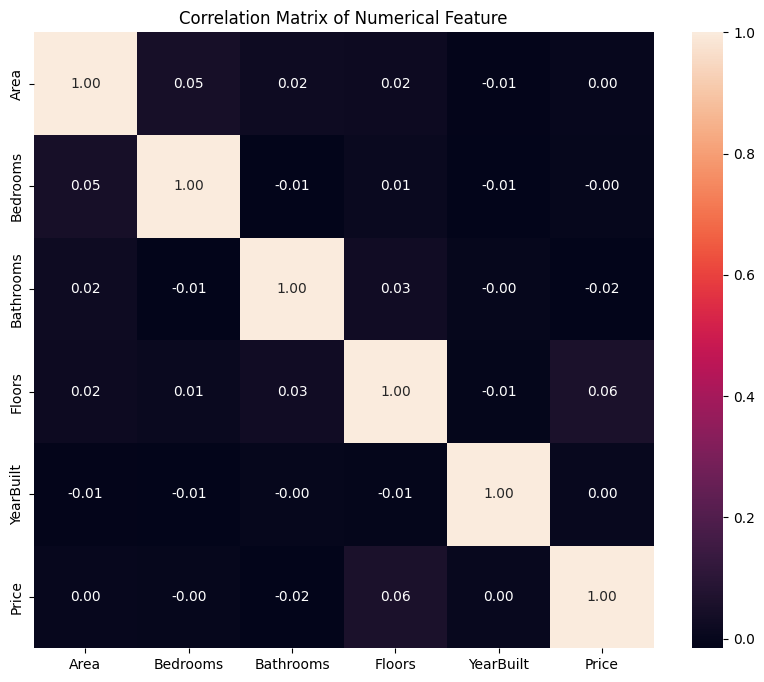

In [28]:
correlation_mat = df[numerical].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numerical Feature")
plt.show()

### Model Training

In [32]:
# Separate features and target variable 
X = df.drop("Price", axis=1)
y = df["Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns 
numerical = X.select_dtypes(include=["int64"]).columns.tolist()
categorical = X.select_dtypes(include=["object"]).columns.tolist()

# Create a pipeline for numerical features
numerical_transformer = make_pipeline(
    RobustScaler()
)

# Create a pipeline for categorical features
categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore")
)

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ]
)

# Build the full pipeline with preprocessing and model
Pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("DecisionTree", DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10))
])

# Fit the pipeline to the training data
Pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('DecisionTree', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [33]:
# Predict and evaluate
y_pred = Pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_pred = Pipeline.predict(X_test)

print("Mean Squared Error: ", mse.__round__(2))
print("Mean Absolute Error: ", mae.__round__(2))
print("R-squared:", r2.__round__(2))

Mean Squared Error:  84985822754.83
Mean Absolute Error:  249415.24
R-squared: -0.09
